# VISUALIZATION CASE STUDY

### Importing the libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = pd.read_csv('SalesData.csv')
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


#### 1. Compare Sales by region for 2016 with 2015 using bar chart

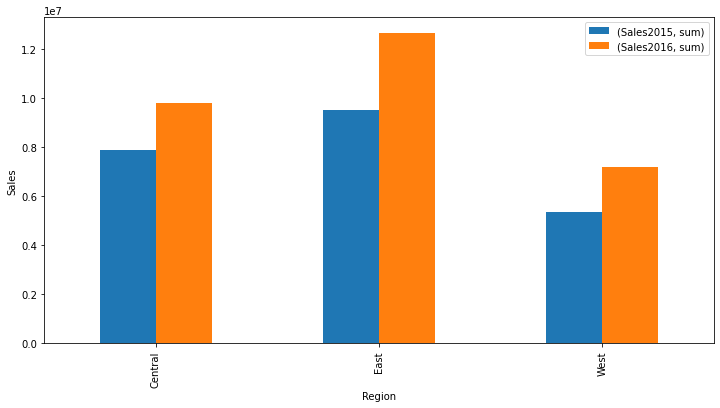

In [62]:
com_sal = sales.groupby('Region').aggregate({'Sales2015':['sum'],'Sales2016':['sum']})
com_sal.plot.bar(figsize=(12,6))
plt.ylabel('Sales')
plt.legend()
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

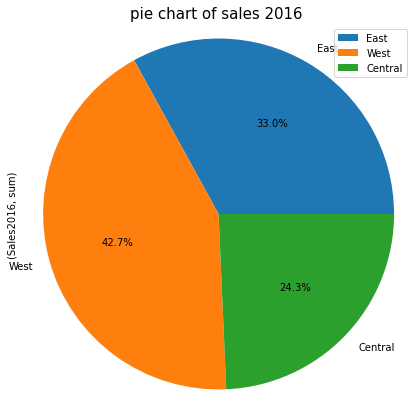

In [35]:
p_sal = sales.groupby(['Region']).aggregate({'Sales2016':['sum']})
p_sal.plot(kind = 'pie',labels = ['East','West','Central'], subplots = True , figsize = (7,7),autopct='%.1f%%')
plt.title('pie chart of sales 2016', fontsize = 15)
plt.axis("equal")
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

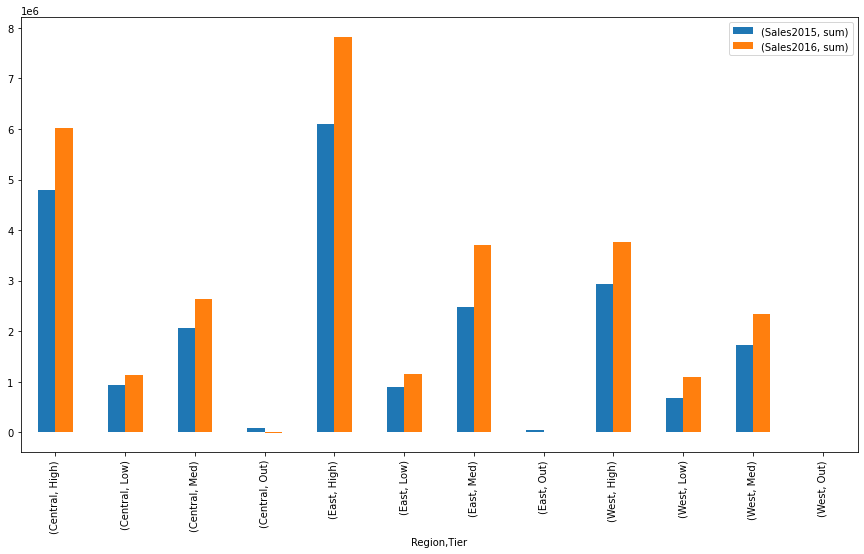

In [64]:
com_tot_sal = sales.groupby(['Region','Tier']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})
com_tot_sal.plot(kind= 'bar',figsize = (15,8))
plt.legend()
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

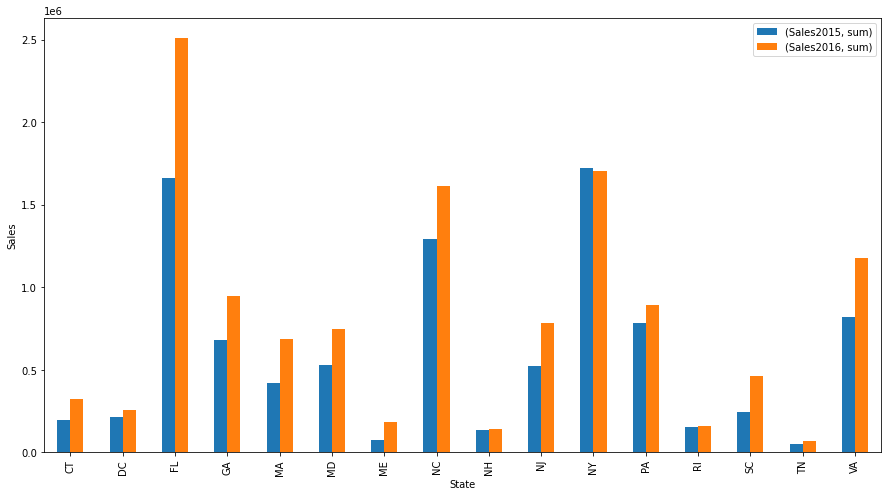

                          In East Region, NY registered a decline in sales in 2016


In [69]:
east_reg = sales.loc[(sales.Region == 'East')]
sal_east_reg = east_reg.groupby(['State']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})
sal_east_reg.plot(kind = 'bar',figsize = (15,8))
plt.legend()
plt.ylabel('Sales')
plt.show()
print("                          In East Region, NY registered a decline in sales in 2016")

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

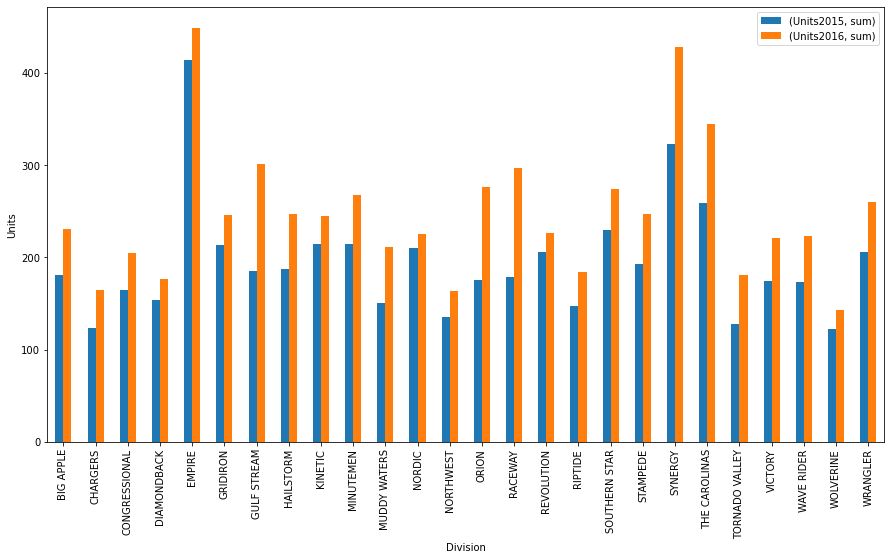

In [78]:
high_T = sales.loc[(sales.Tier == 'High')]
sal_5 = high_T.groupby(['Division']).aggregate({'Units2015':['sum'],'Units2016':['sum']})
sal_5.plot(kind = 'bar',figsize = (15,8))
plt.legend()
plt.ylabel('Units')
plt.show()

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
#### dataset. The Quarters are based on months and defined as -
#### • Jan - Mar : Q1
#### • Apr - Jun : Q2
#### • Jul - Sep : Q3
#### • Oct - Dec : Q4 

In [86]:
month = sales['Month']
# user define function
quarter = []
for i in month:
    if i in ['Jan','Feb','Mar']:
        quarter.append('Q1')
    if i in ['Apr','may','Jun']:
        quarter.append('Q2')
    if i in ['Jul','Aug','Sep']:
        quarter.append('Q3')
    else:
        quarter.append('Q4')

        
sales['Qtr'] = pd.Series(quarter)
    

#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

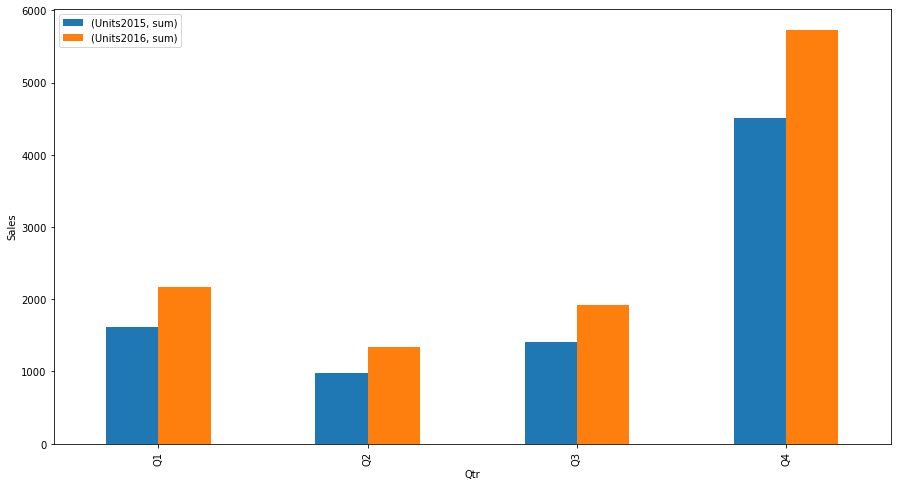

In [93]:
com_qtr = sales.groupby(['Qtr']).aggregate({'Units2015':['sum'],'Units2016':['sum']})
com_qtr.plot(kind = 'bar',figsize = (15,8))
plt.ylabel('Sales')
plt.legend()
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [97]:
qtr_pivot = sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')
qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,10040.169491,5348.685120,8579.730882,0.0000
Q2,9269.807982,5268.125824,6855.559839,-812.1325
Q3,8775.369309,4834.170654,7651.500383,0.0000
Q4,8463.816817,5366.844107,8592.476856,0.0000


<AxesSubplot:ylabel='Q1'>

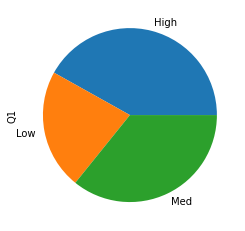

In [104]:
#Q1
qtr_pivot.loc['Q1'].plot(kind = 'pie' )

In [107]:
#Q2
qtr_pivot.loc['Q2'].plot(kind = 'pie')

ValueError: pie plot doesn't allow negative values

<AxesSubplot:ylabel='Q3'>

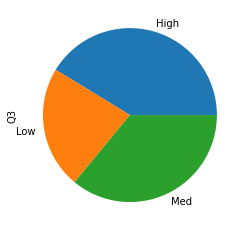

In [105]:
#Q3
qtr_pivot.loc['Q3'].plot(kind = 'pie')

<AxesSubplot:ylabel='Q4'>

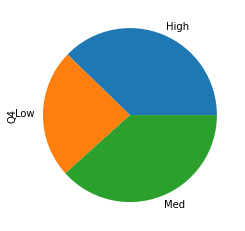

In [106]:
#Q4
qtr_pivot.loc['Q4'].plot(kind = 'pie')